### <center>Muhammad Rifkyandryan Rustanto</center>
#### <center>F1D022077</center>

# Here you can put your extraordinary code

### Kode-Kode

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import cv2 as cv

Import Library
1. NumPy adalah pustaka yang sangat berguna untuk komputasi numerik di Python. Biasanya digunakan untuk manipulasi array dan matriks.

2. matplotlib.image diimpor sebagai img: Ini adalah modul dari Matplotlib yang memungkinkan pembacaan dan penulisan gambar dalam berbagai format file gambar.

3. matplotlib.pyplot diimpor sebagai plt: Pyplot adalah sub-modul yang menyediakan antarmuka yang mirip dengan MATLAB untuk plotting.

4. cv2 merupakan pustaka OpenCV, yang sering digunakan untuk pemrosesan gambar, penglihatan komputer, dan kecerdasan buatan.

Kode dibawah Membaca gambar menggunakan fungsi imread dari modul matplotlib.image. Gambar dibaca dan disimpan dalam variabel image.
Kemudian Mengonversi gambar ke skala abu-abu menggunakan fungsi cvtColor dari pustaka OpenCV (cv2). Hasilnya disimpan dalam variabel gray.
dan terakhir menampilkannya dengan fungsi plt

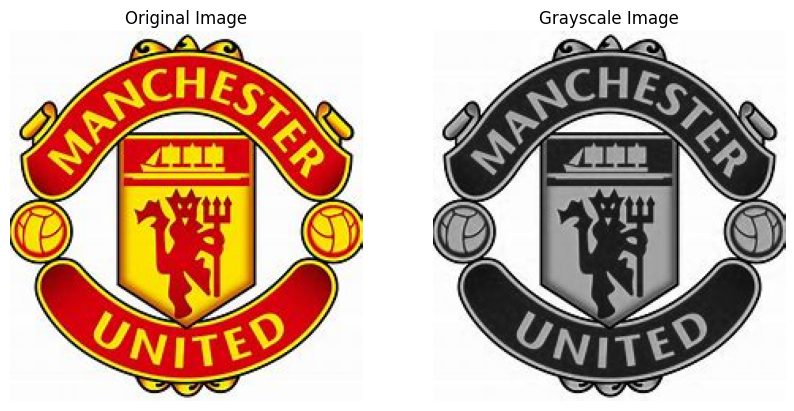

In [2]:
image = img.imread("../assets/manchester_united.jpeg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1) 
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)  
plt.imshow(gray, cmap='gray')  
plt.title("Grayscale Image")
plt.axis("off")

plt.show()

In [3]:
def median(matriks):
    flattened = []
    for row in matriks:
        for pixel in row:
            flattened.append(pixel)
    flattened.sort()
    length = len(flattened)
    if length % 2 == 0:
        return (flattened[length // 2 - 1] + flattened[length // 2]) // 2
    else:
        return flattened[length // 2]

Pembuatan fungsi median. Fungsi ini digunakan untuk mencari rata rata, dengan cara mengonversi matriks gambar ke dalam satu dimensi (flattened), mengurutkan nilai piksel dari yang terkecil ke terbesar, dan kemudian menentukan nilai median dari list tersebut. Jika panjang list adalah bilangan genap, nilai median dihitung sebagai rata-rata dari dua nilai tengah; jika panjang list adalah bilangan ganjil, nilai median adalah nilai tengah langsung.

In [4]:
def modus(matriks):
   subarray = matriks.flatten()
   for x in range(len(matriks)):
      for y in range(0, len(subarray)-x-1): 
         if subarray[y] > subarray[y+1]:
            subarray[y], subarray[y+1] = subarray[y+1], subarray[y]

   indeks = np.zeros (np.max(subarray) + 1, dtype= int )
   for i in range (len(subarray)):
      indeks[subarray[i]] += 1    
   cek = np.max(indeks)
   for j in range (len(indeks)):
      if (indeks[j] == cek):
         return j

Pembuatan fungsi modus. Fungsi ini digunakan unutk mencari nilai modus dalam matriks gambar. Pertama, ia mengubah matriks gambar ke dalam satu dimensi, kemudian mengurutkan nilai-nilainya menggunakan algoritma bubble sort. Setelah itu, ia membuat array untuk menyimpan frekuensi kemunculan setiap nilai piksel. Terakhir, fungsi mencari nilai dengan frekuensi kemunculan tertinggi (modus) dan mengembalikannya.

In [5]:
def convolution(img, kernel, method):
    x, y = img.shape
    kernel_height, kernel_width = kernel.shape

    padding_height = kernel_height // 2
    padding_width = kernel_width // 2

    padded_img = np.pad(img, ((padding_height, padding_height), (padding_width, padding_width)), mode='constant')
    
    result = np.zeros((x, y))
    for i in range(x):
        for j in range(y):
            pad = padded_img[i:i+kernel_height, j:j+kernel_width]
            if method == "mean" or method == "konvolusi":
                result[i][j] = np.sum(padded_img[i:i+kernel_height, j:j+kernel_width] * kernel)
            elif method == "median":
                result[i][j] = int(median(pad))
            elif method == "modus":
                result[i][j] = int(modus(pad))
    return result

Pembuatan fungsi convolution. Fungsi ini melakukan operasi konvolusi pada gambar menggunakan kernel yang diberikan. Pertama, gambar dipadding dengan menggunakan nilai piksel yang konstan di pinggir gambar. Kemudian, untuk setiap piksel dalam gambar asli, sub-matriks seukuran kernel diambil, dan operasi konvolusi dilakukan. Metode konvolusi yang digunakan bergantung pada parameter method. Jika method adalah "mean" atau "konvolusi", maka hasilnya adalah nilai rata-rata dari konvolusi. Jika method adalah "median", maka nilai median diambil. Jika method adalah "modus", maka nilai modus diambil.

In [6]:
kernel_sharpen = np.array([[1/9, 1/9, 1/9],
                           [1/9, 8/9, 1/9],
                           [1/9, 1/9, 1/9]])

kernel_smooth = np.array([[1/10, 1/10, 1/10],
                          [1/10, 1/5, 1/10],
                          [1/10, 1/10, 1/10]])

kernel_3 = np.ones((3, 3)) * (1/9)
kernel_9 = np.ones((9, 9)) * (1/81)

Pembuatan kernel kernel yang akan digunakan

### Perbaikan Citra
Kode ini melakukan proses konvolusi dengan berbagai kernel dan metode yang telah didefinisikan sebelumnya, kemudian menampilkan gambar hasilnya menggunakan matplotlib.pyplot

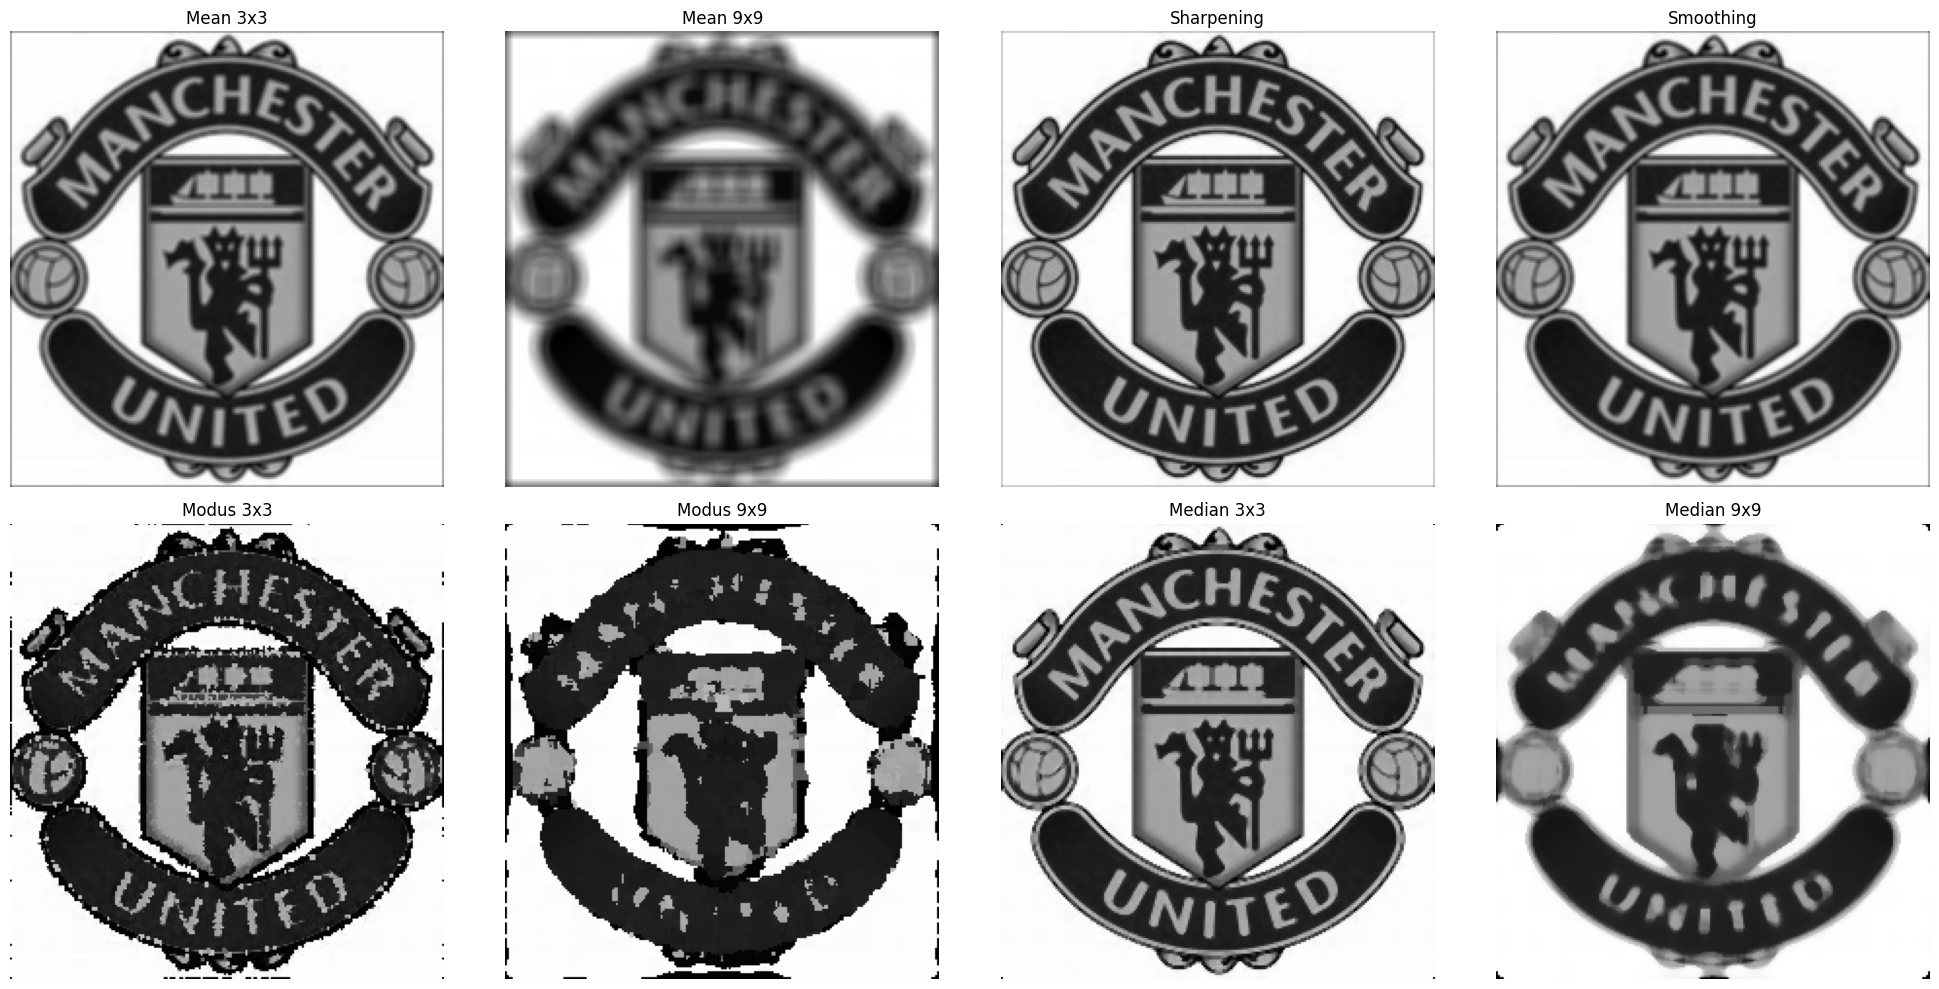

In [7]:
mean_filtered_3 = convolution(gray, kernel_3, "mean")
mean_filtered_9 = convolution(gray, kernel_9, "mean")
sharpening = convolution(gray, kernel_sharpen,"konvolusi")
smoothing = convolution(gray, kernel_smooth, "konvolusi")
median_filtered_3 = convolution(gray, kernel_3, "median")
median_filtered_9 = convolution(gray, kernel_9, "median")
modus_filtered_3 = convolution(gray, kernel_3, "modus")
modus_filtered_9 = convolution(gray, kernel_9, "modus")

plt.figure(figsize=[20, 10])
plt.subplot(2, 4, 1)
plt.title("Mean 3x3")
plt.imshow(mean_filtered_3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 2)
plt.title("Mean 9x9")
plt.imshow(mean_filtered_9, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 3)
plt.title("Sharpening")
plt.imshow(sharpening, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 4)
plt.title("Smoothing")
plt.imshow(smoothing, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 5)
plt.title("Modus 3x3")
plt.imshow(modus_filtered_3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.title("Modus 9x9")
plt.imshow(modus_filtered_9, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 7)
plt.title("Median 3x3")
plt.imshow(median_filtered_3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 8)
plt.title("Median 9x9")
plt.imshow(median_filtered_9, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

### Deteksi Tepi Dengan Filter Prewwit

In [8]:
def prewitt(image):
    prewitt_x = np.array([[-1, 0, 1],
                          [-1, 0, 1],
                          [-1, 0, 1]])
    prewitt_y = np.array([[-1, -1, -1],
                          [0, 0, 0],
                          [1, 1, 1]])
    gx = convolution(image, prewitt_x, "konvolusi")
    gy = convolution(image, prewitt_y, "konvolusi")
    gradient_magnitude = np.sqrt(gx**2 + gy**2)
    return gradient_magnitude

Pembuatan fungsi prewitt. Fungsi ini menerima gambar sebagai input, kemudian menerapkan filter Prewitt secara terpisah pada arah horizontal (gx) dan vertikal (gy) dengan menggunakan fungsi convolution. Selanjutnya, magnitudo gradien dihitung dengan menggunakan rumus Euclidean sqrt(gx^2 + gy^2), dan hasilnya dikembalikan.

Kode di bawah ini melakukan proses deteksi tepi dengan kernel perwitt dengan metode yang telah didefinisikan sebelumnya, kemudian menampilkan gambar hasilnya menggunakan matplotlib.pyplot

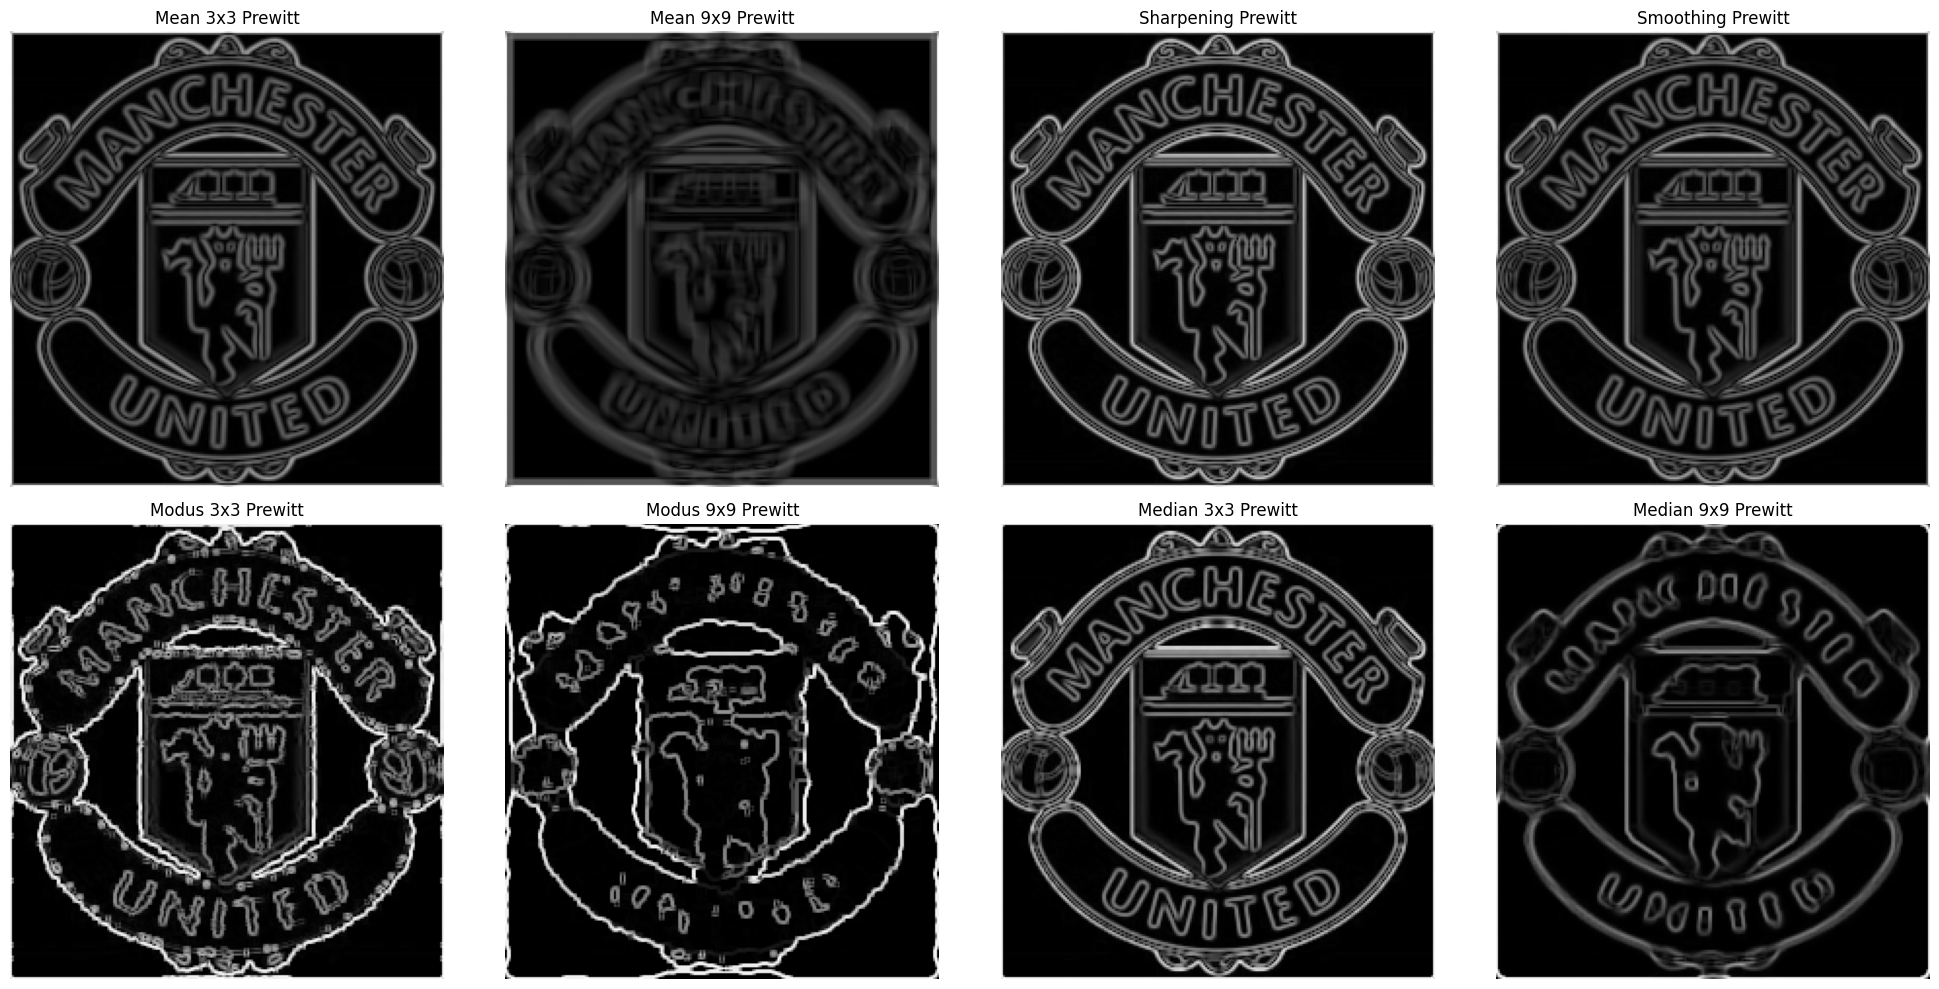

In [9]:
mean_prewitt_3 = prewitt(mean_filtered_3)
mean_prewitt_9 = prewitt(mean_filtered_9)
sharp_prewitt = prewitt(sharpening)
smooth_prewitt = prewitt(smoothing)
modus_prewitt_3 = prewitt(modus_filtered_3)
modus_prewitt_9 = prewitt(modus_filtered_9)
median_prewitt_3 = prewitt(median_filtered_3)
median_prewitt_9 = prewitt(median_filtered_9)

plt.figure(figsize=[20, 10])

plt.subplot(2, 4, 1)
plt.title("Mean 3x3 Prewitt")
plt.imshow(mean_prewitt_3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 2)
plt.title("Mean 9x9 Prewitt")
plt.imshow(mean_prewitt_9, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 3)
plt.title("Sharpening Prewitt")
plt.imshow(sharp_prewitt, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 4)
plt.title("Smoothing Prewitt")
plt.imshow(smooth_prewitt, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 5)
plt.title("Modus 3x3 Prewitt")
plt.imshow(modus_prewitt_3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.title("Modus 9x9 Prewitt")
plt.imshow(modus_prewitt_9, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 7)
plt.title("Median 3x3 Prewitt")
plt.imshow(median_prewitt_3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 8)
plt.title("Median 9x9 Prewitt")
plt.imshow(median_prewitt_9, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

### Deteksi Tepi Dengan Filter Sobel

In [10]:
def sobel(image):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])
    gx = convolution(image, sobel_x, "konvolusi")
    gy = convolution(image, sobel_y, "konvolusi")
    gradient_magnitude = np.sqrt(gx**2 + gy**2)
    return gradient_magnitude

Pembuatan fungsi sobel. Fungsi ini menerima gambar sebagai input, kemudian menerapkan filter sobel secara terpisah pada arah horizontal (gx) dan vertikal (gy) dengan menggunakan fungsi convolution. Selanjutnya, magnitudo gradien dihitung dengan menggunakan rumus Euclidean sqrt(gx^2 + gy^2), dan hasilnya dikembalikan.

Kode dibawah ini melakukan proses deteksi tepi dengan kernel sobel dengan metode yang telah didefinisikan sebelumnya, kemudian menampilkan gambar hasilnya menggunakan matplotlib.pyplot

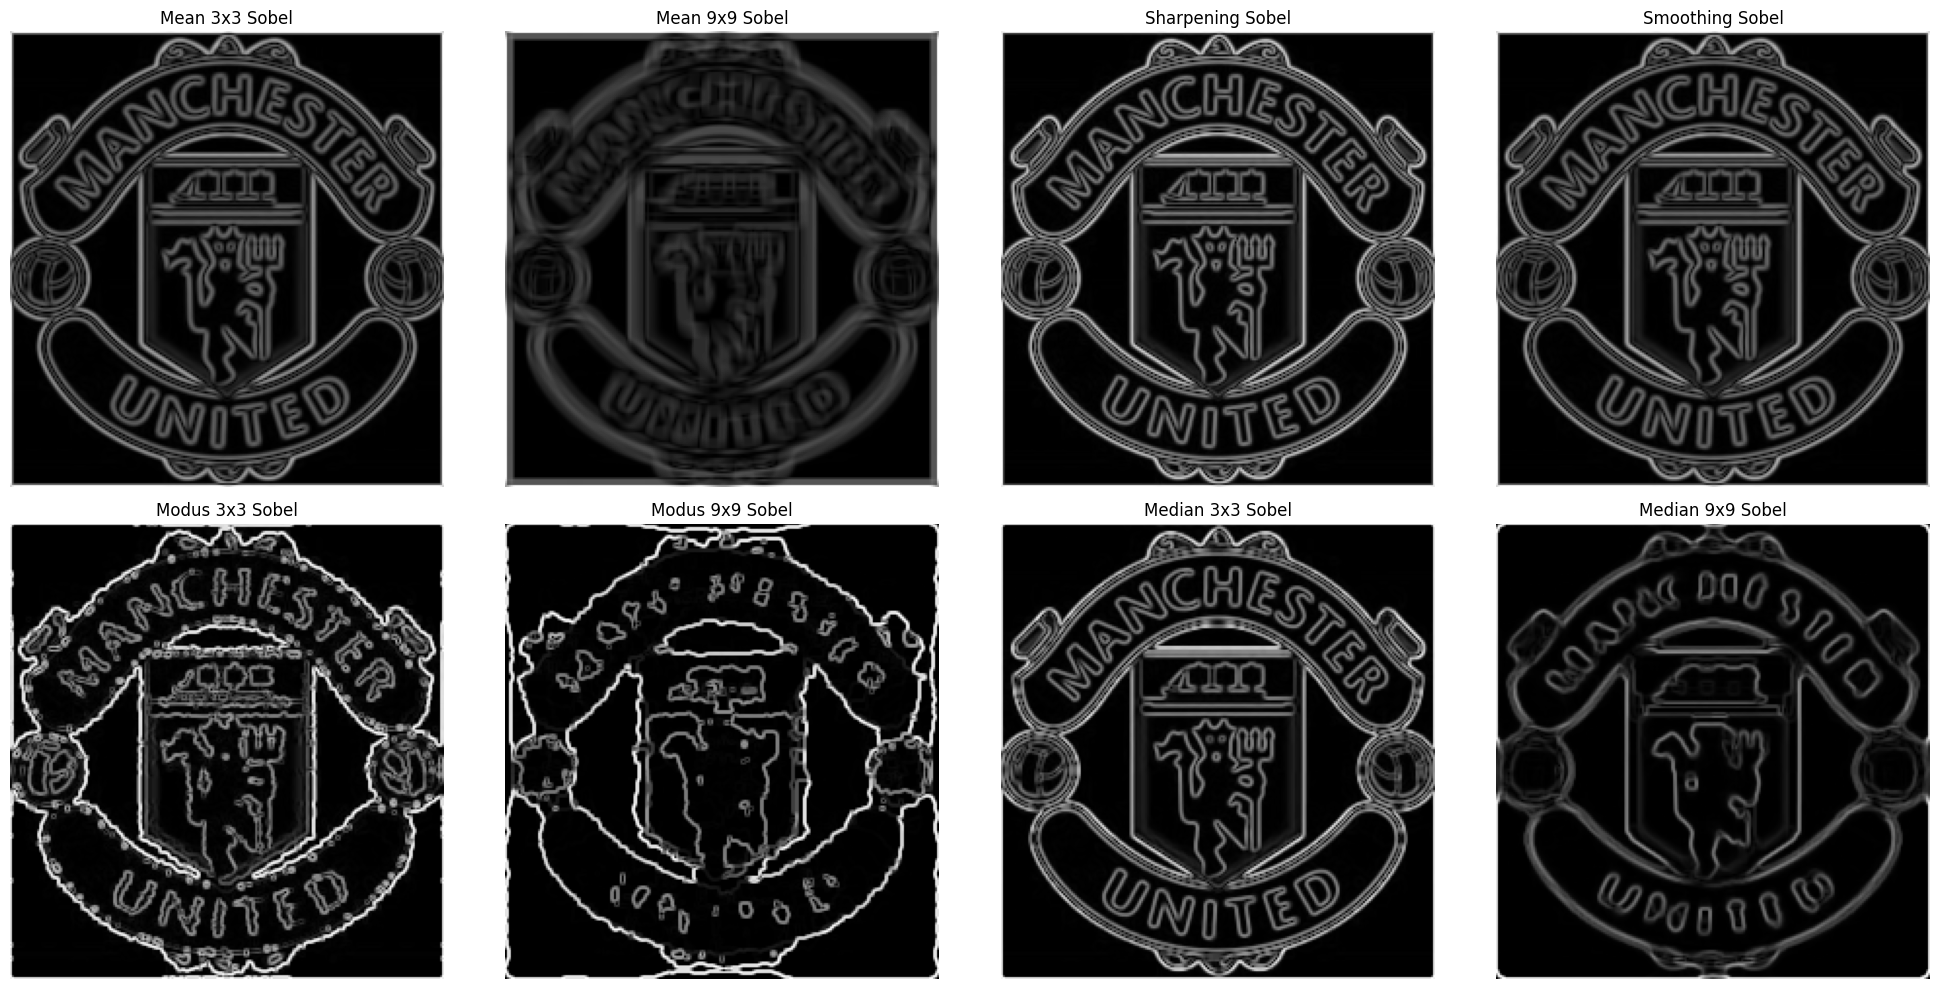

In [11]:
mean_sobel_3 = sobel(mean_filtered_3)
mean_sobel_9 = sobel(mean_filtered_9)
sharp_sobel = sobel(sharpening)
smooth_sobel = sobel(smoothing)
modus_sobel_3 = sobel(modus_filtered_3)
modus_sobel_9 = sobel(modus_filtered_9)
median_sobel_3 = sobel(median_filtered_3)
median_sobel_9 = sobel(median_filtered_9)

plt.figure(figsize=[20, 10])

plt.subplot(2, 4, 1)
plt.title("Mean 3x3 Sobel")
plt.imshow(mean_sobel_3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 2)
plt.title("Mean 9x9 Sobel")
plt.imshow(mean_sobel_9, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 3)
plt.title("Sharpening Sobel")
plt.imshow(sharp_sobel, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 4)
plt.title("Smoothing Sobel")
plt.imshow(smooth_sobel, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 5)
plt.title("Modus 3x3 Sobel")
plt.imshow(modus_sobel_3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.title("Modus 9x9 Sobel")
plt.imshow(modus_sobel_9, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 7)
plt.title("Median 3x3 Sobel")
plt.imshow(median_sobel_3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 8)
plt.title("Median 9x9 Sobel")
plt.imshow(median_sobel_9, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


### Deteksi Tepi Dengan Filter Roberts

In [12]:
def roberts(image):
    roberts_x = np.array([[1, 0],
                          [0, -1]])
    roberts_y = np.array([[0, 1],
                          [-1, 0]])
    gx = convolution(image, roberts_x, "konvolusi")
    gy = convolution(image, roberts_y, "konvolusi")
    gradient_magnitude = np.sqrt(gx**2 + gy**2)
    return gradient_magnitude

Pembuatan fungsi roberts. Fungsi ini menerima gambar sebagai input, kemudian menerapkan filter roberts secara terpisah pada arah horizontal (gx) dan vertikal (gy) dengan menggunakan fungsi convolution. Selanjutnya, magnitudo gradien dihitung dengan menggunakan rumus Euclidean sqrt(gx^2 + gy^2), dan hasilnya dikembalikan.

Kode dibawah ini melakukan proses deteksi tepi dengan kernel Roberts dengan metode yang telah didefinisikan sebelumnya, kemudian menampilkan gambar hasilnya menggunakan matplotlib.pyplot

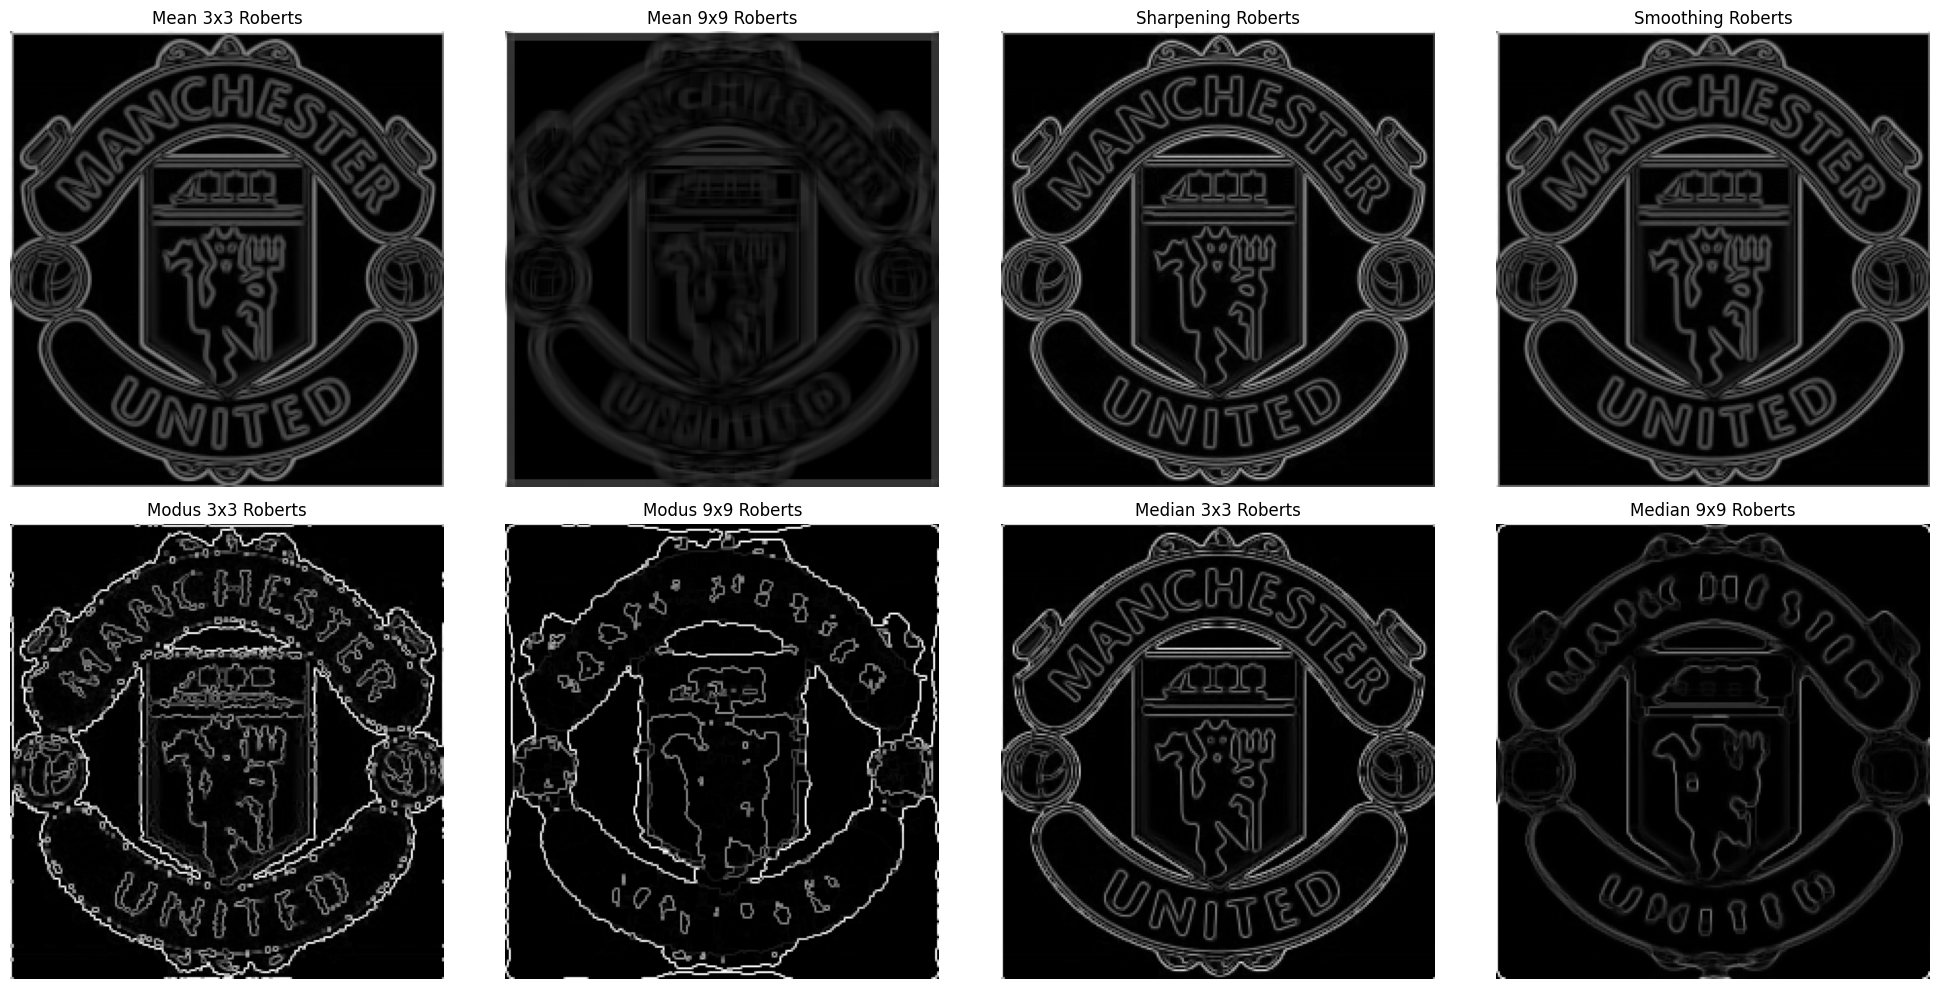

In [13]:
mean_roberts_3 = roberts(mean_filtered_3)
mean_roberts_9 = roberts(mean_filtered_9)
sharp_roberts = roberts(sharpening)
smooth_roberts = roberts(smoothing)
modus_roberts_3 = roberts(modus_filtered_3)
modus_roberts_9 = roberts(modus_filtered_9)
median_roberts_3 = roberts(median_filtered_3)
median_roberts_9 = roberts(median_filtered_9)

plt.figure(figsize=[20, 10])

plt.subplot(2, 4, 1)
plt.title("Mean 3x3 Roberts")
plt.imshow(mean_roberts_3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 2)
plt.title("Mean 9x9 Roberts")
plt.imshow(mean_roberts_9, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 3)
plt.title("Sharpening Roberts")
plt.imshow(sharp_roberts, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 4)
plt.title("Smoothing Roberts")
plt.imshow(smooth_roberts, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 5)
plt.title("Modus 3x3 Roberts")
plt.imshow(modus_roberts_3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.title("Modus 9x9 Roberts")
plt.imshow(modus_roberts_9, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 7)
plt.title("Median 3x3 Roberts")
plt.imshow(median_roberts_3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 8)
plt.title("Median 9x9 Roberts")
plt.imshow(median_roberts_9, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()